# Solar Power Data Analysis

This notebook analyzes solar power data from the personal_power.xlsx file, focusing on the 'solar' sheet.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
plt.style.use('ggplot')
sns.set_theme()

# Display plots inline
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Load the Solar Data

We'll read the 'solar' sheet from the Excel file.

In [2]:
# Load the solar data sheet
file_path = 'personal_power.xlsx'
solar_data = pd.read_excel(file_path, sheet_name='SGU-Solar', skiprows=3)

# Display the first few rows to understand the data structure
solar_data.head()

,Small Unit Postcode,Jan 2011 - Rated Power Output In kW,Feb 2011 - Rated Power Output In kW,Mar 2011 - Rated Power Output In kW,Apr 2011 - Rated Power Output In kW,May 2011 - Rated Power Output In kW,Jun 2011 - Rated Power Output In kW,Jul 2011 - Rated Power Output In kW,Aug 2011 - Rated Power Output In kW,Sep 2011 - Rated Power Output In kW,...,Jun 2024 - Rated Power Output In kW,Jul 2024 - Rated Power Output In kW,Aug 2024 - Rated Power Output In kW,Sep 2024 - Rated Power Output In kW,Oct 2024 - Rated Power Output In kW,Nov 2024 - Rated Power Output In kW,Dec 2024 - Rated Power Output In kW,Jan 2025 - Rated Power Output In kW,Feb 2025 - Rated Power Output In kW,Mar 2025 - Rated Power Output In kW
0,0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.000,0.0,0.0,0.0,0.0
1,200,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.000,0.0,0.0,0.0,0.0
2,800,0.0,0.0,0.0,0.0,2.22,0.0,3.04,0.0,0.0,...,94.38,0.0,29.92,84.05,99.0,123.045,0.0,0.0,0.0,0.0
3,801,0.0,0.0,0.0,0.0,2.02,0.0,0.00,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.000,0.0,0.0,0.0,0.0
4,803,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,...,0.00,0.0,0.00,0.00,0.0,0.000,0.0,0.0,0.0,0.0


## Exploratory Data Analysis

Let's perform some exploratory analysis on the solar data.

In [3]:
# Check for missing values
print(f"Missing values in each column:\n{solar_data.isna().sum()}\n")

# Check data types
print(f"Data types:\n{solar_data.dtypes}\n")

# Basic information about the dataset
print(f"Dataset shape: {solar_data.shape}")

# Clean up column names by removing extra whitespaces
solar_data.columns = [col.strip() for col in solar_data.columns]

Missing values in each column:
Small Unit Postcode                    0
Jan 2011 - Rated Power Output In kW    0
Feb 2011 - Rated Power Output In kW    0
Mar 2011 - Rated Power Output In kW    0
Apr 2011 - Rated Power Output In kW    0
                                      ..
Nov 2024 - Rated Power Output In kW    0
Dec 2024 - Rated Power Output In kW    0
Jan 2025 - Rated Power Output In kW    0
Feb 2025 - Rated Power Output In kW    0
Mar 2025 - Rated Power Output In kW    0
Length: 172, dtype: int64

Data types:
Small Unit Postcode                      int64
Jan 2011 - Rated Power Output In kW    float64
Feb 2011 - Rated Power Output In kW    float64
Mar 2011 - Rated Power Output In kW    float64
Apr 2011 - Rated Power Output In kW    float64
                                        ...   
Nov 2024 - Rated Power Output In kW    float64
Dec 2024 - Rated Power Output In kW    float64
Jan 2025 - Rated Power Output In kW    float64
Feb 2025 - Rated Power Output In kW    float64
Mar 2025 

In [4]:
# Extract columns for recent months (2024-2025) for analysis
recent_columns = [col for col in solar_data.columns if '2024' in col or '2025' in col]

# Create a melted dataframe for easier time series visualization
# First, let's make a copy with just the relevant columns
time_series_data = solar_data[['Small Unit Postcode'] + recent_columns].copy()

# Melt the data for time series analysis
melted_data = pd.melt(time_series_data, 
                     id_vars=['Small Unit Postcode'],
                     value_vars=recent_columns,
                     var_name='Month', 
                     value_name='Power_Output')

# Display the restructured data
melted_data.head(10)

,Small Unit Postcode,Month,Power_Output
0,0,Jan 2024 - Rated Power Output In kW,0.00
1,200,Jan 2024 - Rated Power Output In kW,0.00
2,800,Jan 2024 - Rated Power Output In kW,0.00
3,801,Jan 2024 - Rated Power Output In kW,0.00
4,803,Jan 2024 - Rated Power Output In kW,0.00
5,804,Jan 2024 - Rated Power Output In kW,0.00
6,810,Jan 2024 - Rated Power Output In kW,50.36
7,811,Jan 2024 - Rated Power Output In kW,0.00
8,812,Jan 2024 - Rated Power Output In kW,43.06
9,813,Jan 2024 - Rated Power Output In kW,0.00


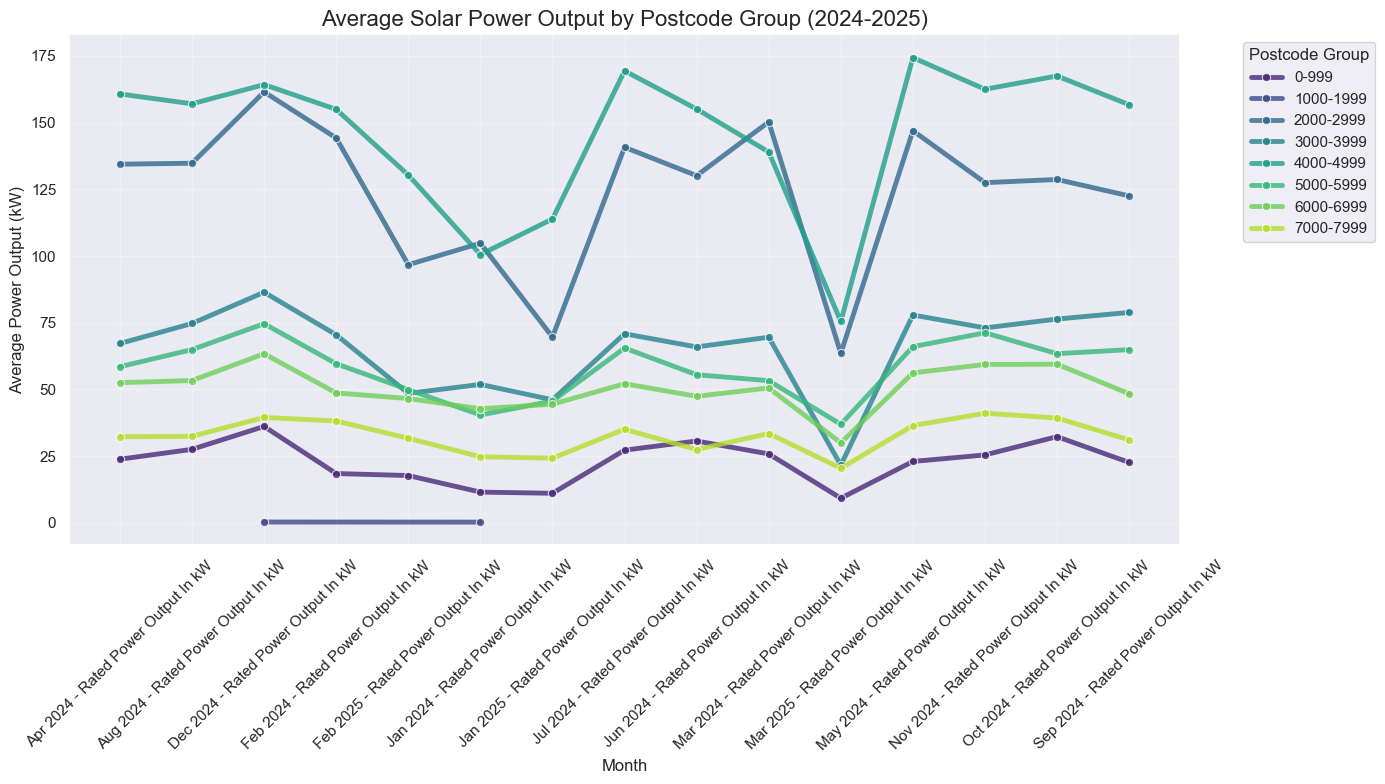

In [21]:
# Aggregate data by postcode group
group_data = melted_data.groupby(['Postcode_Group', 'Month'])['Power_Output'].mean().reset_index()

# Create a visualization of power output by postcode group
plt.figure(figsize=(14, 8))

# Filter for active data points
group_active_data = group_data[group_data['Power_Output'] > 0]

# Plot the grouped data
sns.lineplot(data=group_active_data, x='Month', y='Power_Output', hue='Postcode_Group', palette='viridis', linewidth=3.5, alpha=0.8, marker='o')

plt.title('Average Solar Power Output by Postcode Group (2024-2025)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Power Output (kW)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Postcode Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

## Comparative Analysis of Power Output

Now let's compare the power output across different postcodes and analyze seasonal patterns.

Top postcodes by total power output:
Small Unit Postcode
2765    30169.395
3029    27758.510
4740    25425.310
3064    21223.875
4655    19320.579
Name: Power_Output, dtype: float64


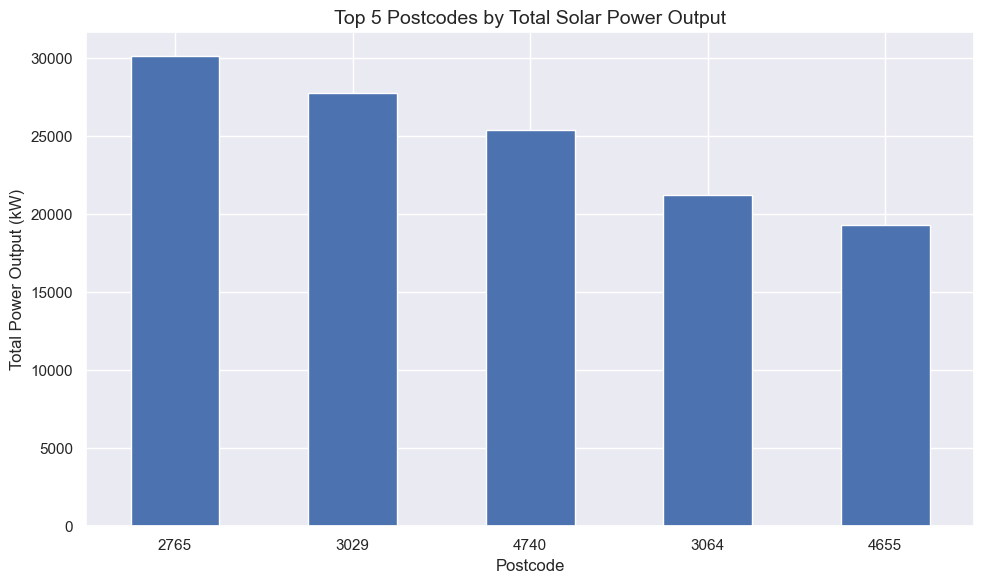

In [6]:
# Analyze top performing postcodes
postcode_totals = melted_data.groupby('Small Unit Postcode')['Power_Output'].sum().sort_values(ascending=False)

# Display top postcodes by total power output
print("Top postcodes by total power output:")
print(postcode_totals.head(5))

# Create a bar chart of top 5 postcodes by power output
plt.figure(figsize=(10, 6))
postcode_totals.head(5).plot(kind='bar')
plt.title('Top 5 Postcodes by Total Solar Power Output', fontsize=14)
plt.xlabel('Postcode', fontsize=12)
plt.ylabel('Total Power Output (kW)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Seasonal Patterns Analysis

Let's analyze how solar power output varies across different seasons and identify any patterns.

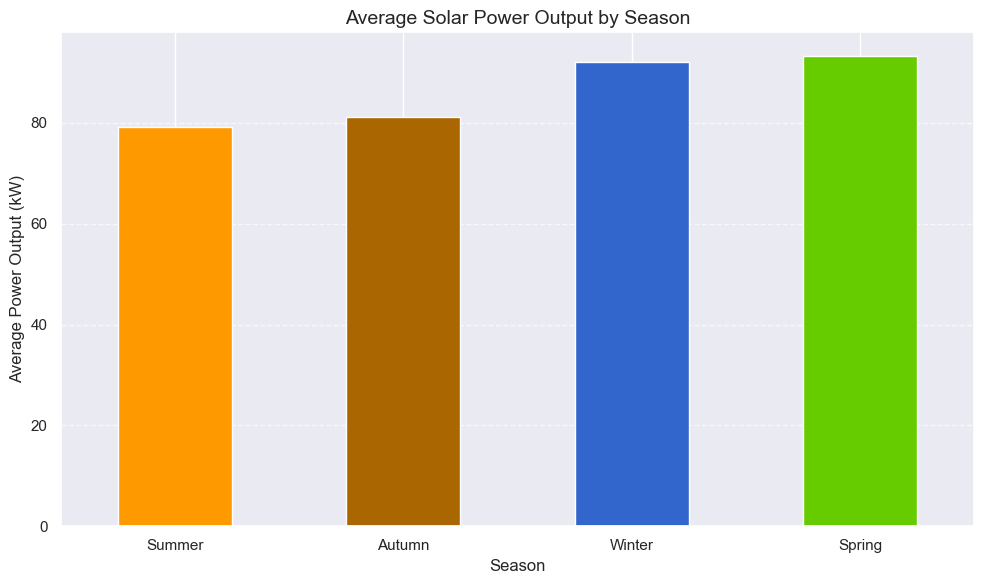

In [7]:
# Extract month information from column names for seasonal analysis
melted_data['Month_Short'] = melted_data['Month'].str.extract(r'(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec)')

# Define seasons
season_map = {
    'Dec': 'Summer', 'Jan': 'Summer', 'Feb': 'Summer',
    'Mar': 'Autumn', 'Apr': 'Autumn', 'May': 'Autumn',
    'Jun': 'Winter', 'Jul': 'Winter', 'Aug': 'Winter',
    'Sep': 'Spring', 'Oct': 'Spring', 'Nov': 'Spring'
}

# Map months to seasons (for Southern Hemisphere)
melted_data['Season'] = melted_data['Month_Short'].map(season_map)

# Calculate average power output by season
seasonal_avg = melted_data.groupby('Season')['Power_Output'].mean().reindex(['Summer', 'Autumn', 'Winter', 'Spring'])

# Visualize seasonal patterns
plt.figure(figsize=(10, 6))
seasonal_avg.plot(kind='bar', color=['#FF9900', '#AA6600', '#3366CC', '#66CC00'])
plt.title('Average Solar Power Output by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Power Output (kW)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Performance Analysis of Postcode 800

Based on the data, postcode 800 appears to have significant solar power generation in 2024. Let's analyze its performance in more detail.

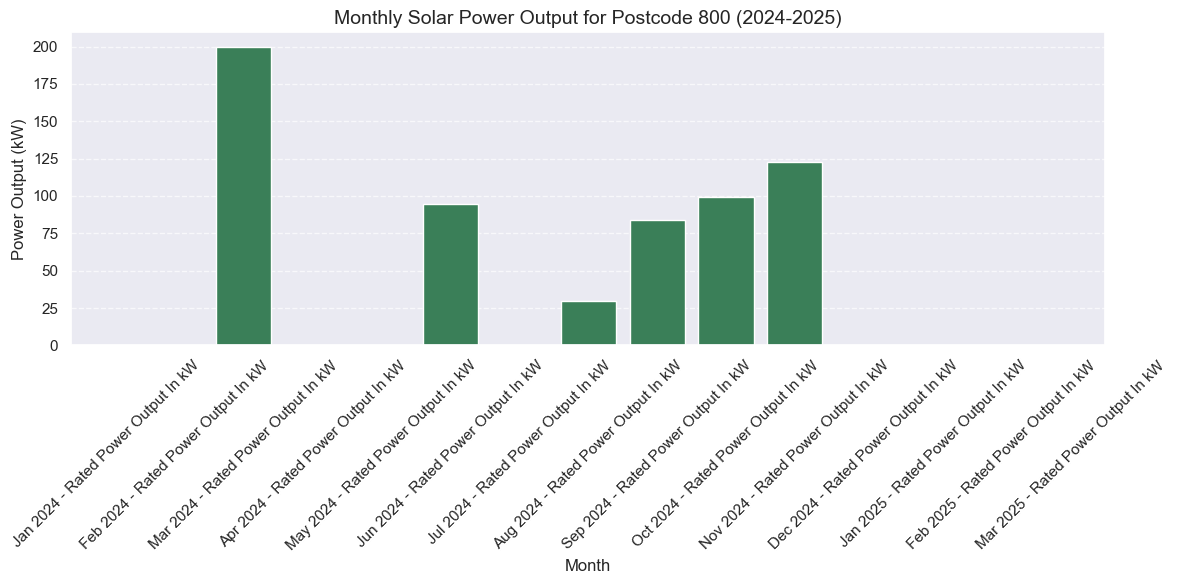

Total power output for postcode 800: 629.99 kW
Average monthly power output: 42.00 kW
Maximum monthly power output: 199.59 kW
Months with zero output: 9


In [8]:
# Focus on postcode 800's performance
postcode_800_data = melted_data[melted_data['Small Unit Postcode'] == 800]

# Create a monthly trend chart for postcode 800
plt.figure(figsize=(12, 6))
sns.barplot(data=postcode_800_data, x='Month', y='Power_Output', color='#2E8B57')
plt.title('Monthly Solar Power Output for Postcode 800 (2024-2025)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Power Output (kW)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate statistics for postcode 800
print(f"Total power output for postcode 800: {postcode_800_data['Power_Output'].sum():.2f} kW")
print(f"Average monthly power output: {postcode_800_data['Power_Output'].mean():.2f} kW")
print(f"Maximum monthly power output: {postcode_800_data['Power_Output'].max():.2f} kW")
print(f"Months with zero output: {(postcode_800_data['Power_Output'] == 0).sum()}")

## Efficiency Analysis and Comparison

Let's analyze the efficiency of solar power generation across different time periods and locations.

In [9]:
# Compare 2024 and 2025 output efficiency (where available)
# Extract year from month column
melted_data['Year'] = melted_data['Month'].str.extract(r'(\d{4})')

# Calculate average output by year
yearly_avg = melted_data.groupby('Year')['Power_Output'].mean()
print("Average power output by year:")
print(yearly_avg)

# Calculate efficiency change between 2024 and 2025 (if both years are present)
if '2024' in yearly_avg.index and '2025' in yearly_avg.index:
    efficiency_change = ((yearly_avg['2025'] - yearly_avg['2024']) / yearly_avg['2024']) * 100
    print(f"\nEfficiency change from 2024 to 2025: {efficiency_change:.2f}%")

# Find the most consistent postcode (lowest standard deviation relative to mean)
postcode_consistency = melted_data.groupby('Small Unit Postcode').agg({
    'Power_Output': ['mean', 'std']
})

# Calculate coefficient of variation (CV) for each postcode
postcode_consistency['Power_Output', 'cv'] = postcode_consistency['Power_Output', 'std'] / postcode_consistency['Power_Output', 'mean']

# Filter out postcodes with zero or very low mean output
active_postcodes = postcode_consistency[postcode_consistency['Power_Output', 'mean'] > 1]

# Sort by CV to find most consistent postcodes
most_consistent = active_postcodes.sort_values(('Power_Output', 'cv'))

print("\nMost consistent postcodes (lowest variation relative to mean):")
print(most_consistent.head(3))

Average power output by year:
Year
2024    92.062996
2025    57.603666
Name: Power_Output, dtype: float64

Efficiency change from 2024 to 2025: -37.43%

Most consistent postcodes (lowest variation relative to mean):
                    Power_Output                      
                            mean         std        cv
Small Unit Postcode                                   
4280                  580.552667   95.534754  0.164558
4306                  944.673000  162.552885  0.172073
6163                  420.600333   72.874450  0.173263


## Grouping Postcodes by Thousands

To create more meaningful visualizations, let's group the postcodes by thousands (e.g., 1000-1999, 2000-2999, etc.).

## Conclusions and Recommendations

Based on our analysis of the solar power output data, we can draw the following conclusions:

In [14]:
# Create a summary of key findings
print("Key Findings from Solar Power Analysis:")
print("-" * 40)

# Top producing postcode
top_postcode = postcode_totals.idxmax()
top_output = postcode_totals.max()
print(f"1. Top producing postcode: {top_postcode} with total output of {top_output:.2f} kW")

# Best performing season
best_season = seasonal_avg.idxmax()
best_season_avg = seasonal_avg.max()
print(f"2. Best performing season: {best_season} with average output of {best_season_avg:.2f} kW")

# Month with highest overall output
month_output = melted_data.groupby('Month')['Power_Output'].sum()
best_month = month_output.idxmax()
best_month_output = month_output.max()
print(f"3. Month with highest overall output: {best_month} with {best_month_output:.2f} kW")

# Percentage of zero-output entries
zero_output_pct = (melted_data['Power_Output'] == 0).mean() * 100
print(f"4. Percentage of zero-output entries: {zero_output_pct:.2f}%")

# Recommendations based on data
print("\nRecommendations:")
print("-" * 40)
print("1. Focus on expanding solar infrastructure in areas with postcode patterns similar to the top performers.")
print(f"2. Optimize maintenance schedules for {best_season} when output is highest.")
print("3. Investigate postcodes with consistently low or zero output for potential system issues.")
print("4. Consider seasonal adjustments to solar panel angles to maximize efficiency year-round.")

Key Findings from Solar Power Analysis:
----------------------------------------
1. Top producing postcode: 2765 with total output of 30169.40 kW
2. Best performing season: Spring with average output of 93.31 kW
3. Month with highest overall output: Dec 2024 - Rated Power Output In kW with 300193.29 kW
4. Percentage of zero-output entries: 31.81%

Recommendations:
----------------------------------------
1. Focus on expanding solar infrastructure in areas with postcode patterns similar to the top performers.
2. Optimize maintenance schedules for Spring when output is highest.
3. Investigate postcodes with consistently low or zero output for potential system issues.
4. Consider seasonal adjustments to solar panel angles to maximize efficiency year-round.
